In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import os
import json
import requests 

This section will make API call and create dataframe with needed data from the Urban Institute of Education Portal accessing the Directory of Common Core of Data from the US Department of Education which is the primary database on public elementary and secondary education. Specifically pulling 2014 directory data for school districts in the state of Florida which based on the api documentation the state code is found under the fips search key at https://educationdata.urban.org/documentation/school-districts.html#overview

In [2]:
# Build query URL
url = "https://educationdata.urban.org/api/v1/school-districts/ccd/directory/"
year = "2014/"
state_code = "12"

query_url = f"{url}{year}?fips={state_code}"

# Request data in json and store variable
fl_ccd_directory_response = requests.get(query_url)
fl_ccd_directory_data = fl_ccd_directory_response.json()

# Establish the results from the request to loop through below
results_directory = fl_ccd_directory_data['results']

# Create Lists to store values for the columns
district_name = []
dir_nces_id = []
state_id = []
latitude = []
longitude = []
urban_locale = []
agency_type = []
total_schools = []
total_students = []
spec_ed_stud = []
eng_lang_stud = []
teachers_fte = []
instru_aids_fte = []
guidance_cons_fte = []
school_staff_fte = []
district_staff_fte = []
staff_total_fte = []

# Loop through results and store values in appropriate lists
for result in results_directory:
    district_name.append(result['lea_name'])
    dir_nces_id.append(result['leaid'])
    state_id.append(result['state_leaid'])
    latitude.append(result['latitude'])
    longitude.append(result['longitude'])
    urban_locale.append(result['urban_centric_locale'])
    agency_type.append(result['agency_type'])
    total_schools.append(result['number_of_schools'])
    total_students.append(result['enrollment'])
    spec_ed_stud.append(result['spec_ed_students'])
    eng_lang_stud.append(result['english_language_learners'])
    teachers_fte.append(result['teachers_total_fte'])
    instru_aids_fte.append(result['instructional_aides_fte'])
    guidance_cons_fte.append(result['guidance_counselors_total_fte'])
    school_staff_fte.append(result['school_staff_total_fte'])
    district_staff_fte.append(result['lea_staff_total_fte'])
    staff_total_fte.append(result['staff_total_fte'])
    
# Create dataframe from results
fl_ccd_directory = pd.DataFrame({"District Name":district_name, "NCES ID":dir_nces_id, "State ID":state_id,                          
                                 "Degree of urbanization":urban_locale, "Agency Type":agency_type,
                                "Total Schools":total_schools, "Total Students Enrolled":total_students,
                                "Special Ed Students":spec_ed_stud, "English Language Students":eng_lang_stud,
                                "Total FTE Teachers":teachers_fte, "Total FTE Instructional Aids": instru_aids_fte,
                                "Total FTE Guidance Counselors": guidance_cons_fte, "Total FTE School Staff":school_staff_fte,
                                "Total FTE District Staff": district_staff_fte, "Total FTE Staff": staff_total_fte,
                                 "Latitude":latitude, "Longitude":longitude})

# Remove all districts that are not regular local school district
clean_fl_ccd_directory = fl_ccd_directory.loc[fl_ccd_directory['Agency Type'] == 1]


clean_fl_ccd_directory

,District Name,NCES ID,State ID,Degree of urbanization,Agency Type,Total Schools,Total Students Enrolled,Special Ed Students,English Language Students,Total FTE Teachers,Total FTE Instructional Aids,Total FTE Guidance Counselors,Total FTE School Staff,Total FTE District Staff,Total FTE Staff,Latitude,Longitude
2,ALACHUA,1200030,01,12,1,73,28689,3788,584,1833,535,61,None,None,4249,29.652601,-82.318977
3,BAKER,1200060,02,32,1,9,4936,538,11,301,65,10,None,None,604,30.277151,-82.118149
5,BAY,1200090,03,22,1,51,27641,4575,567,1844,732,66,None,None,3735,30.172516,-85.675934
6,BRADFORD,1200120,04,32,1,12,3199,645,6,242,56,8,None,None,507,29.951584,-82.112663
7,BREVARD,1200150,05,21,1,129,72285,11931,2344,4776,791,183,None,None,9109,28.248600,-80.736115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,UNION,1201890,63,32,1,9,2384,387,0,175,32,6,None,None,343,30.017477,-82.338341
66,VOLUSIA,1201920,64,21,1,92,61777,9879,3479,4153,593,142,None,None,7586,29.030180,-81.308472
67,WAKULLA,1201950,65,42,1,15,5141,976,8,327,84,9,None,None,708,30.176279,-84.379211
68,WALTON,1201980,66,41,1,23,8435,799,300,569,99,18,None,None,1164,30.720671,-86.098549


In [3]:
# Create a list of district names that were not regular local schools to drop from other tables
drop_agencies = fl_ccd_directory[fl_ccd_directory['Agency Type'] != 1]
drop_ids = drop_agencies['District Name'].tolist()

drop_ids

['FL VIRTUAL',
 'CESA',
 'LAKE WALES CHARTER SCHOOLS',
 'WASH SPECIAL',
 'FAU LAB SCH',
 'FSU LAB SCH',
 'FAMU LAB SCH',
 'UF LAB SCH',
 'DEAF/BLIND']

This section will make API call and create dataframe with needed data from the Urban Institute of Education Portal accessing the Directory of Common Core of Data from the US Department of Education which is the primary database on public elementary and secondary education. Specifically pulling 2014 financal data for school districts in the state of Florida.  Use the same fips code for state above.

In [4]:
# Build query URL
url = "https://educationdata.urban.org/api/v1/school-districts/ccd/finance/"
year = "2014/"
state_code = "12"

query_url = f"{url}{year}?fips={state_code}"

# Request data in json and store variable
fl_ccd_finance_response = requests.get(query_url)
fl_ccd_finance_data = fl_ccd_finance_response.json()

# Establish the results from the request to loop through below
results_financial = fl_ccd_finance_data['results']

# Create Lists to store values for the columns
fin_nces_id = []
total_rev = []
fed_total_rev = []
st_total_rev = []
loc_total_rev = []
loc_prop_tax_rev = []
total_exp = []
intruct_staff_exp = []
general_admin_exp = []
school_admin_exp = []
operation_plant_exp = []
student_transport_exp = []

# Loop through results and store values in appropriate lists
for result in results_financial:
    fin_nces_id.append(result['leaid'])
    total_rev.append(result['rev_total'])
    fed_total_rev.append(result['rev_fed_total'])
    st_total_rev.append(result['rev_state_total'])
    loc_total_rev.append(result['rev_local_total'])
    loc_prop_tax_rev.append(result['rev_local_prop_tax'])
    total_exp.append(result['exp_total'])
    intruct_staff_exp.append(result['exp_current_instruc_staff'])
    general_admin_exp.append(result['exp_current_general_admin'])
    school_admin_exp.append(result['exp_current_sch_admin'])
    operation_plant_exp.append(result['exp_current_operation_plant'])
    student_transport_exp.append(result['exp_current_student_transport'])
    
# Create dataframe from results
fl_ccd_financial = pd.DataFrame({"NCES ID":fin_nces_id, "Total Revenue":total_rev, "Total Federal Revenue":fed_total_rev,                        
                                 "Total State Revenue":st_total_rev, "Total Local Revenue":loc_total_rev,
                                "Local Revenue (Property Tax)":loc_prop_tax_rev, "Total Expense":total_exp,
                                 "Total Expense for Instruction Staff":intruct_staff_exp,
                                "Total Expense for General Admin":general_admin_exp, "Total Expense for School Admin":school_admin_exp,
                                "Total Expense for Operations":operation_plant_exp, "Total Expense for Student Transportation":student_transport_exp})

# Remove all districts without financial data
clean_fl_ccd_financial = fl_ccd_financial.loc[fl_ccd_financial['Total Revenue'] > 0]

clean_fl_ccd_financial.head()

,NCES ID,Total Revenue,Total Federal Revenue,Total State Revenue,Total Local Revenue,Local Revenue (Property Tax),Total Expense,Total Expense for Instruction Staff,Total Expense for General Admin,Total Expense for School Admin,Total Expense for Operations,Total Expense for Student Transportation
2,1200030,272451000.0,34881000.0,119810000.0,117760000,103083000,269955000,21763000,3041000,13128000,29535000,11174000
3,1200060,42674000.0,4704000.0,29197000.0,8773000,6266000,44360000,2595000,732000,2007000,4385000,2613000
5,1200090,268131000.0,26772000.0,103527000.0,137832000,101316000,278559000,11183000,2045000,13550000,20567000,8132000
6,1200120,31053000.0,4941000.0,17021000.0,9091000,6476000,31823000,1490000,734000,1792000,3197000,1629000
7,1200150,673236000.0,76493000.0,320008000.0,276735000,221801000,652911000,49626000,5282000,36220000,55676000,17750000


This section will make API call and create dataframe from the Urban Institute of Education Portal accessing The US Census Bureau's Small Area Income and Poverty Estimates.  Specifically pulling 2014 estimated poverity data for school aged children fo school districts in the state of Florida.  Use the same fips paramaters as above.

In [5]:
# Build query URL
url = "https://educationdata.urban.org/api/v1/school-districts/saipe/"
year = "2014/"
state_code = "12"

query_url = f"{url}{year}?fips={state_code}"

# Request data in json and store variable
fl_saipe_poverty_response = requests.get(query_url)
fl_saipe_poverty_data = fl_saipe_poverty_response.json()

# Establish the results from the request to loop through below
results_poverity = fl_saipe_poverty_data['results']

# Create Lists to store values for the columns
pov_nces_id = []
est_pop_total = []
est_pop_5to17 = []
est_pop_5to17_perc = []
est_pop_5to17_poverity = []
est_pop_5to17_poverity_perc = []


# Loop through results and store values in appropriate lists
for result in results_poverity:
    pov_nces_id.append(result['leaid'])
    est_pop_total.append(result['est_population_total'])
    est_pop_5to17.append(result['est_population_5_17'])
    est_pop_5to17_perc.append(result['est_population_5_17_pct'])
    est_pop_5to17_poverity.append(result['est_population_5_17_poverty'])
    est_pop_5to17_poverity_perc.append(result['est_population_5_17_poverty_pct'])

    
# Create dataframe from results
fl_saipe_poverity = pd.DataFrame({"NCES ID":pov_nces_id, "Estimated Total Population":est_pop_total, 
                                 "Estimated Total Population Ages 5–17":est_pop_5to17,                        
                                 "Share of Population that are school ages 5–17":est_pop_5to17_perc, 
                                 "Estimated Population Ages 5–17 in poverity":est_pop_5to17_poverity,
                                "Share of School-Age Population (5–17) in poverity":est_pop_5to17_poverity_perc})

fl_saipe_poverity.head()

,NCES ID,Estimated Total Population,Estimated Total Population Ages 5–17,Share of Population that are school ages 5–17,Estimated Population Ages 5–17 in poverity,Share of School-Age Population (5–17) in poverity
0,1200030,256380.0,32012.0,0.124862,6438.0,0.201112
1,1200060,27093.0,5004.0,0.184697,1146.0,0.229017
2,1200090,178985.0,27626.0,0.154348,5939.0,0.214979
3,1200120,26702.0,3847.0,0.144072,1047.0,0.272160
4,1200150,556885.0,78183.0,0.140393,15431.0,0.197370


In [6]:
# Combined all above API calls in to one dataframe to match with District Name

dem_pov_nces_combined = pd.merge(clean_fl_ccd_directory,fl_saipe_poverity, on="NCES ID")
fl_nces_combined = pd.merge(dem_pov_nces_combined,clean_fl_ccd_financial, on="NCES ID")
fl_nces_combined.head()

,District Name,NCES ID,State ID,Degree of urbanization,Agency Type,Total Schools,Total Students Enrolled,Special Ed Students,English Language Students,Total FTE Teachers,...,Total Federal Revenue,Total State Revenue,Total Local Revenue,Local Revenue (Property Tax),Total Expense,Total Expense for Instruction Staff,Total Expense for General Admin,Total Expense for School Admin,Total Expense for Operations,Total Expense for Student Transportation
0,ALACHUA,1200030,01,12,1,73,28689,3788,584,1833,...,34881000.0,119810000.0,117760000,103083000,269955000,21763000,3041000,13128000,29535000,11174000
1,BAKER,1200060,02,32,1,9,4936,538,11,301,...,4704000.0,29197000.0,8773000,6266000,44360000,2595000,732000,2007000,4385000,2613000
2,BAY,1200090,03,22,1,51,27641,4575,567,1844,...,26772000.0,103527000.0,137832000,101316000,278559000,11183000,2045000,13550000,20567000,8132000
3,BRADFORD,1200120,04,32,1,12,3199,645,6,242,...,4941000.0,17021000.0,9091000,6476000,31823000,1490000,734000,1792000,3197000,1629000
4,BREVARD,1200150,05,21,1,129,72285,11931,2344,4776,...,76493000.0,320008000.0,276735000,221801000,652911000,49626000,5282000,36220000,55676000,17750000


This section will read in the excel files from the Florida Department of Education for 2014 and clean the dataframes with only the needed information.

In [7]:
# Read in Florida District 21+ Absents Data
fl_2014_21absents_path = "fldoe_data/2014_FL_21absents.xlsx"
fl_2014_21absents_data = pd.read_excel(os.path.join(fl_2014_21absents_path), header=2)

# Remove all district names that were dropped due to not local school district
clean_fl_2014_21absents=fl_2014_21absents_data[~fl_2014_21absents_data["District Name"].isin(drop_ids)]

clean_fl_2014_21absents

,District #,District Name,Enrollments,Absent 21 Days or Over,% Absent 21 or More Days
0,0,FLORIDA,3111840,303913,0.097663
1,1,ALACHUA,32688,3101,0.094867
2,2,BAKER,5377,1005,0.186907
3,3,BAY,32074,4095,0.127674
4,4,BRADFORD,3820,703,0.184031
...,...,...,...,...,...
62,63,UNION,2644,465,0.175870
63,64,VOLUSIA,70784,7841,0.110774
64,65,WAKULLA,5615,989,0.176135
65,66,WALTON,9621,723,0.075148


In [8]:
# Read in Florida District Dropout Data
fl_2014_dropout_path = "fldoe_data/2014_FL_dropout_rates.xls"
fl_2014_dropout_data = pd.read_excel(os.path.join(fl_2014_dropout_path),header=4)

# Remove all district names that were dropped due to not local school district and state total
clean_fl_2014_dropout=fl_2014_dropout_data[~fl_2014_dropout_data["District Name"].isin(drop_ids)]
clean_fl_2014_dropout = clean_fl_2014_dropout.loc[clean_fl_2014_dropout['District Name'] != "FLORIDA"]

clean_fl_2014_dropout

,Dist #,District Name,White Dropouts (numerator),White Enrollment (denominator),White Dropout Rate,Black Dropouts (numerator),Black Enrollment (denominator),Black Dropout Rate,Hispanic Dropouts (numerator),Hispanic Enrollment (denominator),...,Pacific Islander Dropout Rate,American Indian Dropouts (numerator),American Indian Enrollment (denominator),American Indian Dropout Rate,Two or More Races Dropouts (numerator),Two or More Races Enrollment (denominator),Two or More Races Dropout Rate,Total Dropouts (numerator),Total Enrollment (denominator),Total Dropout Rate
1,1,ALACHUA,58,4418,0.0131281,174,3115,0.055859,17,803,...,*,1,20,0.05,14,419,0.0334129,265,9182,0.028861
2,2,BAKER,13,1131,0.0114943,0,151,0.000000,0,24,...,*,*,*,*,0,26,0,13,1344,0.009673
3,3,BAY,65,5713,0.0113776,16,1255,0.012749,8,461,...,*,0,34,0,4,359,0.0111421,95,8033,0.011826
4,4,BRADFORD,2,686,0.00291545,4,210,0.019048,0,24,...,*,*,*,*,0,24,0,6,955,0.006283
5,5,BREVARD,101,14766,0.00684004,48,3130,0.015335,26,3138,...,0,0,55,0,15,1441,0.0104094,191,23071,0.008279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,63,UNION,3,554,0.00541516,3,115,0.026087,0,36,...,*,*,*,*,0,28,0,6,741,0.008097
64,64,VOLUSIA,109,12604,0.00864805,58,3393,0.017094,32,3757,...,0,4,78,0.0512821,5,734,0.00681199,208,20976,0.009916
65,65,WAKULLA,16,1194,0.0134003,2,157,0.012739,0,37,...,*,*,*,*,0,61,0,18,1468,0.012262
66,66,WALTON,39,1870,0.0208556,3,208,0.014423,12,193,...,*,0,11,0,0,103,0,54,2408,0.022425


In [9]:
# Read in Florida District Demographic Data
fl_2014_demographics_path = "fldoe_data/2014_FL_membership_demographics.xls"
fl_2014_demographics_data = pd.read_excel(os.path.join(fl_2014_demographics_path), sheet_name = "DISTRICT", header=4)

# Remove all district names that were dropped due to not local school district and only selct rows for district totals
clean_fl_2014_demographics=fl_2014_demographics_data[~fl_2014_demographics_data["District"].isin(drop_ids)]
clean_fl_2014_demographics = clean_fl_2014_demographics.loc[clean_fl_2014_demographics['Grade'] == "TOTAL"]

clean_fl_2014_demographics

,District #,District,Grade,White,Black or African American,Hispanic/Latino,Asian,Native Hawaiian or Other Pacific Islander,American Indian or Alaska Native,Two or More Races,Female Total,Male Total,Total
14,1,ALACHUA,TOTAL,12837,10177,2483,1370,28,55,1726,14040,14636,28676
29,2,BAKER,TOTAL,4096,572,92,20,2,14,141,2383,2554,4937
44,3,BAY,TOTAL,19231,4229,1818,580,37,118,1548,13435,14126,27561
59,4,BRADFORD,TOTAL,2269,727,67,25,12,6,80,1533,1653,3186
74,5,BREVARD,TOTAL,45137,10607,9727,1508,92,166,5042,35062,37217,72279
...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,63,UNION,TOTAL,1852,332,87,5,3,6,99,1170,1214,2384
959,64,VOLUSIA,TOTAL,36880,9627,11405,1160,72,175,2457,29931,31845,61776
974,65,WAKULLA,TOTAL,4168,542,150,28,4,14,235,2431,2710,5141
989,66,WALTON,TOTAL,6525,532,856,73,7,27,417,4028,4409,8437


In [10]:
# Read in Florida District Teacher Out of Field Data
fl_2014_teacher_outfield_path = "fldoe_data/2014_FL_teacher_outoffield.xls"
fl_2014_teacher_outfield_data = pd.read_excel(os.path.join(fl_2014_teacher_outfield_path), header=3)

# Remove all district names that were dropped due to not local school district
clean_fl_2014_teacher_outfield = fl_2014_teacher_outfield_data[~fl_2014_teacher_outfield_data["District Name"].isin(drop_ids)]
clean_fl_2014_teacher_outfield = clean_fl_2014_teacher_outfield.loc[clean_fl_2014_teacher_outfield['School Name'] == "DISTRICT TOTAL"]

clean_fl_2014_teacher_outfield

,Dist #,District Name,Sch #,School Name,Total\nCourses,Total\nIn Field,Total\nOut Field,% In Field,% Out Field
1,1,ALACHUA,,DISTRICT TOTAL,34441,34302,139,0.99596,0.00404
66,2,BAKER,,DISTRICT TOTAL,4459,3987,472,0.89415,0.10585
75,3,BAY,,DISTRICT TOTAL,26142,25531,611,0.97663,0.02337
127,4,BRADFORD,,DISTRICT TOTAL,3697,3352,345,0.90668,0.09332
139,5,BREVARD,,DISTRICT TOTAL,92484,90968,1516,0.98361,0.01639
...,...,...,...,...,...,...,...,...,...
4019,63,UNION,,DISTRICT TOTAL,2172,2024,148,0.93186,0.06814
4026,64,VOLUSIA,,DISTRICT TOTAL,79789,76261,3528,0.95578,0.04422
4117,65,WAKULLA,,DISTRICT TOTAL,4417,4093,324,0.92665,0.07335
4131,66,WALTON,,DISTRICT TOTAL,8495,8311,184,0.97834,0.02166


In [11]:
# Read in Florida District Free and Reduced Lunch Data - specific sheet read is the latest survey for the year
#2014-15 SURVEY 3 PRELIMINARY DATA (as of 5/5/2015)
fl_2014_lunch_path = "fldoe_data/2014_FL_lunch_status.xlsx"
fl_2014_lunch_data = pd.read_excel(os.path.join(fl_2014_lunch_path), sheet_name = "Demo Preliminary Survey 3-Dist",
                                  header=4)

# Remove all district names that were dropped due to not local school district
clean_fl_2014_lunch = fl_2014_lunch_data[~fl_2014_lunch_data["District Name"].isin(drop_ids)]

# Groupby District Number
grouped_fl_2014_lunch = clean_fl_2014_lunch.groupby(["District Number","District Name"])

grouped_fl_2014_lunch.sum()

,,White,Unnamed: 4,Unnamed: 5,Black or African American,Unnamed: 7,Unnamed: 8,Hispanic or Latino,Unnamed: 10,Unnamed: 11,Asian,...,Unnamed: 17,American Indian or Alaska Native,Unnamed: 19,Unnamed: 20,Two or More Races,Unnamed: 22,Unnamed: 23,Total,Unnamed: 25,Unnamed: 26
District Number,District Name,,,,,,,,,,,,,,,,,,,,,
1.0,ALACHUA,1697,1928,3625,3945,4080,8025,588,705,1293,126,...,12,14,13,27,481,506,987,6858,7393,14251
2.0,BAKER,1097,1159,2256,237,286,523,27,36,63,6,...,1,5,6,11,60,54,114,1432,1546,2978
3.0,BAY,5024,5449,10473,1807,1774,3581,644,672,1316,148,...,27,41,41,82,542,550,1092,8214,8673,16887
4.0,BRADFORD,717,809,1526,337,312,649,28,29,57,4,...,10,3,3,6,38,31,69,1131,1193,2324
5.0,BREVARD,8846,9554,18400,4152,4216,8368,2940,3104,6044,231,...,54,44,48,92,1401,1512,2913,17632,18701,36333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63.0,UNION,533,559,1092,137,142,279,35,26,61,0,...,3,3,3,6,37,45,82,745,779,1524
64.0,VOLUSIA,9250,10061,19311,4079,4203,8282,4461,4916,9377,261,...,49,66,54,120,916,878,1794,19060,20424,39484
65.0,WAKULLA,984,1090,2074,188,235,423,55,51,106,5,...,0,3,3,6,98,84,182,1333,1467,2800


# Finding the Mean and Median for Dropout Rate

In [79]:
florida_dropout_rate = clean_fl_2014_dropout[["District Name", "Total Dropout Rate"]]
florida_dropout_rate.head()

,District Name,Total Dropout Rate
1,ALACHUA,0.028861
2,BAKER,0.009673
3,BAY,0.011826
4,BRADFORD,0.006283
5,BREVARD,0.008279


In [13]:
florida_dropout_rate.describe()

,Total Dropout Rate
count,67.000000
mean,0.016037
std,0.011796
min,0.000000
25%,0.007894
50%,0.011628
75%,0.022702
max,0.057082


In [14]:
mean = florida_dropout_rate["Total Dropout Rate"].mean()
mean

0.016036537313432835

In [97]:
florida_dropout_rate_mean = florida_dropout_rate.loc[(florida_dropout_rate["Total Dropout Rate"] > mean - .004) & (florida_dropout_rate["Total Dropout Rate"] < mean + .004)]
florida_dropout_rate_mean

,District Name,Total Dropout Rate
6,BROWARD,0.014282
9,CITRUS,0.014999
19,FRANKLIN,0.014837
29,HILLSBOROUGH,0.013770
34,LAFAYETTE,0.014451
44,MONROE,0.013564
60,SUMTER,0.014013
65,WAKULLA,0.012262


In [16]:
median = florida_dropout_rate["Total Dropout Rate"].median()
median

0.011628

In [86]:
florida_dropout_rate_median = florida_dropout_rate.loc[(florida_dropout_rate["Total Dropout Rate"] > median - .002) & (florida_dropout_rate["Total Dropout Rate"] < median + .003)]
districts = florida_dropout_rate_median["District Name"]
florida_dropout_rate_median

,District Name,Total Dropout Rate
2,BAKER,0.009673
3,BAY,0.011826
6,BROWARD,0.014282
10,CLAY,0.010588
11,COLLIER,0.010949
17,ESCAMBIA,0.010126
22,GLADES,0.011628
23,GULF,0.009820
29,HILLSBOROUGH,0.013770
34,LAFAYETTE,0.014451


# Determining the Districts for Analysis

In [87]:
florida_dropout_rate_median["Above/Below"] = np.where(florida_dropout_rate_median['Total Dropout Rate'] > median, 'Above', 'Below')
florida_dropout_rate_median

<ipython-input-87-91cb14078f91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  florida_dropout_rate_median["Above/Below"] = np.where(florida_dropout_rate_median['Total Dropout Rate'] > median, 'Above', 'Below')


,District Name,Total Dropout Rate,Above/Below
2,BAKER,0.009673,Below
3,BAY,0.011826,Above
6,BROWARD,0.014282,Above
10,CLAY,0.010588,Below
11,COLLIER,0.010949,Below
17,ESCAMBIA,0.010126,Below
22,GLADES,0.011628,Below
23,GULF,0.009820,Below
29,HILLSBOROUGH,0.013770,Above
34,LAFAYETTE,0.014451,Above


In [73]:
# Creating List of Distric Names that are above the Median
florida_dropout_rate_df_above= florida_dropout_rate_median.loc[florida_dropout_rate_median["Total Dropout Rate"] > median]
districts_above_median = florida_dropout_rate_df_above["District Name"]
districts_above_median

3              BAY
6          BROWARD
29    HILLSBOROUGH
34       LAFAYETTE
44          MONROE
60          SUMTER
65         WAKULLA
Name: District Name, dtype: object

In [25]:
# Creating List of Distric Names that are below the Median
florida_dropout_rate_df_below = florida_dropout_rate_median.loc[florida_dropout_rate_median["Total Dropout Rate"] < median]
districts_below_median = florida_dropout_rate_df_below["District Name"]
districts_below_median

2         BAKER
10         CLAY
11      COLLIER
17     ESCAMBIA
23         GULF
46     OKALOOSA
56    ST. LUCIE
58     SARASOTA
64      VOLUSIA
Name: District Name, dtype: object

# Financial Analysis

In [92]:
# Pulling all financial data for districts for analysis
fl_district_financials = pd.merge(florida_dropout_rate_median,fl_nces_combined, on="District Name")
districts_financials = fl_district_financials[fl_district_financials["District Name"].isin(districts)]
districts_financials

,District Name,Total Dropout Rate,Above/Below,NCES ID,State ID,Degree of urbanization,Agency Type,Total Schools,Total Students Enrolled,Special Ed Students,...,Total Federal Revenue,Total State Revenue,Total Local Revenue,Local Revenue (Property Tax),Total Expense,Total Expense for Instruction Staff,Total Expense for General Admin,Total Expense for School Admin,Total Expense for Operations,Total Expense for Student Transportation
0,BAKER,0.009673,Below,1200060,02,32,1,9,4936,538,...,4704000.0,2.919700e+07,8773000,6266000,44360000,2595000,732000,2007000,4385000,2613000
1,BAY,0.011826,Above,1200090,03,22,1,51,27641,4575,...,26772000.0,1.035270e+08,137832000,101316000,278559000,11183000,2045000,13550000,20567000,8132000
2,BROWARD,0.014282,Above,1200180,06,21,1,382,266265,33535,...,285351000.0,9.802860e+08,1268177000,1067157000,2561097000,105513000,17827000,130535000,235664000,81193000
3,CLAY,0.010588,Below,1200300,10,21,1,50,35835,6768,...,25957000.0,1.888790e+08,91920000,65101000,302332000,16765000,2161000,14978000,24186000,10500000
4,COLLIER,0.010949,Below,1200330,11,21,1,72,45228,5775,...,53875000.0,8.222200e+07,399374000,362886000,534047000,29000000,3366000,29918000,51092000,18890000
5,ESCAMBIA,0.010126,Below,1200510,17,21,1,75,40735,5779,...,52213000.0,1.837050e+08,157076000,115995000,409375000,27568000,3502000,15570000,38989000,16275000
6,GLADES,0.011628,Below,1200660,22,41,1,11,1603,265,...,2248000.0,9.289000e+06,5220000,4132000,31237000,812000,583000,730000,1539000,515000
7,GULF,0.009820,Below,1200690,23,41,1,6,1872,308,...,2137000.0,6.173000e+06,10931000,9529000,19561000,1471000,853000,831000,2332000,902000
8,HILLSBOROUGH,0.013770,Above,1200870,29,21,1,329,207469,28985,...,299615000.0,1.022546e+09,687916000,530555000,2165489000,157221000,13538000,102680000,139813000,74337000
9,LAFAYETTE,0.014451,Above,1201020,34,43,1,7,1244,184,...,1514000.0,7.495000e+06,2484000,1848000,11127000,1067000,559000,601000,939000,541000


In [141]:
# # Pulling all financial data for districts below the median
# districts_above_financials = fl_nces_combined[fl_nces_combined["District Name"].isin(districts_above_median)]
# districts_above_financials

In [142]:
# # Pulling all financial data for districts below the median
# districts_below_financials = fl_nces_combined[fl_nces_combined["District Name"].isin(districts_below_median)]
# districts_below_financials

# Revenue Analaysis

In [99]:
district_rev = districts_financials[["District Name","Above/Below", "Total Schools", "Total Students Enrolled", "Total Revenue",
                                             "Total Federal Revenue", "Total State Revenue", "Total Local Revenue",
                                            "Local Revenue (Property Tax)"]]


perc_fed = district_rev["Total Federal Revenue"] / district_rev["Total Revenue"]
perc_state = district_rev["Total State Revenue"]/district_rev["Total Revenue"]
perc_local = district_rev["Total Local Revenue"]/district_rev["Total Revenue"]
perc_prop_tax = district_rev["Local Revenue (Property Tax)"]/district_rev["Total Local Revenue"]


district_rev["Revenue % from Federal"] = perc_fed
district_rev["Revenue % from State"] = perc_state
district_rev["Revenue % from Local"] = perc_local
district_rev["Revenue % from Property Tax"] = perc_prop_tax

# Format columns
# district_rev = district_rev.style.format({"Total Revenue": "${:,.0f}" , "Total Federal Revenue": "${:,.0f}",
#                                                             "Total State Revenue":"${:,.0f}", "Total Local Revenue":"${:,.0f}",
#                                                             "Local Revenue (Property Tax)":"${:,.0f}", 
#                                                             "Revenue % from Federal":"{:.2%}", "Revenue % from State":"{:.2%}",
#                                                             "Revenue % from Local":"{:.2%}", "Revenue % from Property Tax":"{:.2%}"})

district_rev

<ipython-input-99-67263de81d4d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  district_rev["Revenue % from Federal"] = perc_fed
<ipython-input-99-67263de81d4d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  district_rev["Revenue % from State"] = perc_state
<ipython-input-99-67263de81d4d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

,District Name,Above/Below,Total Schools,Total Students Enrolled,Total Revenue,Total Federal Revenue,Total State Revenue,Total Local Revenue,Local Revenue (Property Tax),Revenue % from Federal,Revenue % from State,Revenue % from Local,Revenue % from Property Tax
0,BAKER,Below,9,4936,4.267400e+07,4704000.0,2.919700e+07,8773000,6266000,0.110231,0.684187,0.205582,0.714237
1,BAY,Above,51,27641,2.681310e+08,26772000.0,1.035270e+08,137832000,101316000,0.099847,0.386106,0.514047,0.735069
2,BROWARD,Above,382,266265,2.533814e+09,285351000.0,9.802860e+08,1268177000,1067157000,0.112617,0.386882,0.500501,0.841489
3,CLAY,Below,50,35835,3.067560e+08,25957000.0,1.888790e+08,91920000,65101000,0.084618,0.615730,0.299652,0.708235
4,COLLIER,Below,72,45228,5.354710e+08,53875000.0,8.222200e+07,399374000,362886000,0.100612,0.153551,0.745837,0.908637
5,ESCAMBIA,Below,75,40735,3.929940e+08,52213000.0,1.837050e+08,157076000,115995000,0.132860,0.467450,0.399691,0.738464
6,GLADES,Below,11,1603,1.675700e+07,2248000.0,9.289000e+06,5220000,4132000,0.134153,0.554336,0.311512,0.791571
7,GULF,Below,6,1872,1.924100e+07,2137000.0,6.173000e+06,10931000,9529000,0.111065,0.320825,0.568110,0.871741
8,HILLSBOROUGH,Above,329,207469,2.010077e+09,299615000.0,1.022546e+09,687916000,530555000,0.149056,0.508710,0.342234,0.771250
9,LAFAYETTE,Above,7,1244,1.149300e+07,1514000.0,7.495000e+06,2484000,1848000,0.131732,0.652136,0.216132,0.743961


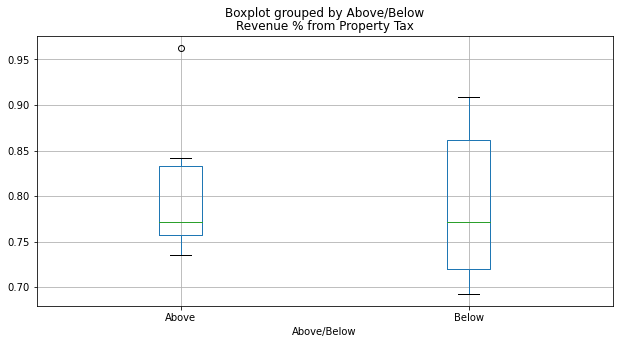

In [111]:
district_rev.boxplot("Revenue % from Property Tax", by="Above/Below", figsize=(10, 5))
plt.show()

In [103]:
# Extract individual groups
above = district_rev[district_rev["Above/Below"] == "Above"]["Revenue % from Property Tax"]
below = district_rev[district_rev["Above/Below"] == "Below"]["Revenue % from Property Tax"]

# Perform the ANOVA
sts.f_oneway(above, below)

F_onewayResult(statistic=0.22541719606894034, pvalue=0.64178157258115)

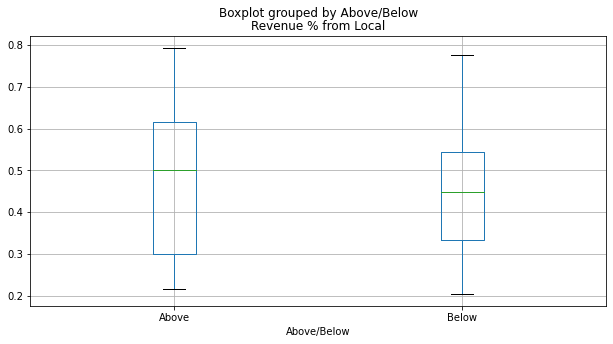

In [112]:
district_rev.boxplot("Revenue % from Local", by="Above/Below", figsize=(10, 5))
plt.show()

In [105]:
# Extract individual groups
above = district_rev[district_rev["Above/Below"] == "Above"]["Revenue % from Local"]
below = district_rev[district_rev["Above/Below"] == "Below"]["Revenue % from Local"]

# Perform the ANOVA
sts.f_oneway(above, below)

F_onewayResult(statistic=0.009518657074765338, pvalue=0.9235705533474156)

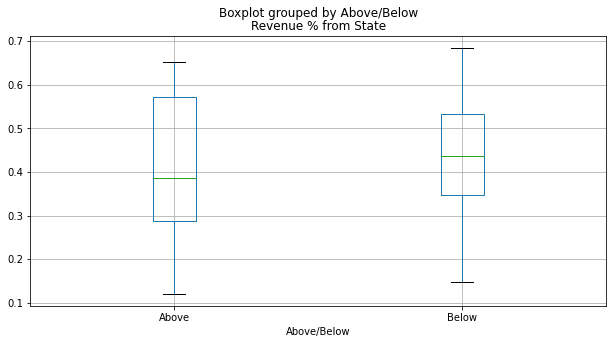

In [113]:
district_rev.boxplot("Revenue % from State", by="Above/Below", figsize=(10, 5))
plt.show()

In [107]:
# Extract individual groups
above = district_rev[district_rev["Above/Below"] == "Above"]["Revenue % from State"]
below = district_rev[district_rev["Above/Below"] == "Below"]["Revenue % from State"]

# Perform the ANOVA
sts.f_oneway(above, below)

F_onewayResult(statistic=0.01865200476879046, pvalue=0.8931849928415416)

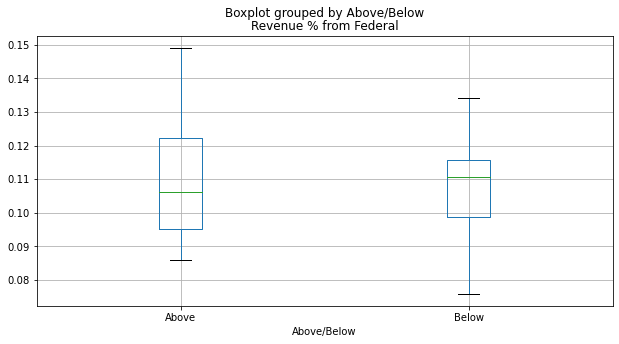

In [115]:
district_rev.boxplot("Revenue % from Federal", by="Above/Below", figsize=(10, 5))
plt.show()

In [109]:
# Extract individual groups
above = district_rev[district_rev["Above/Below"] == "Above"]["Revenue % from Federal"]
below = district_rev[district_rev["Above/Below"] == "Below"]["Revenue % from Federal"]

# Perform the ANOVA
sts.f_oneway(above, below)

F_onewayResult(statistic=0.09410857679055241, pvalue=0.7632349057797901)

In [138]:

# dist_above_rev = districts_above_financials[["District Name","Total Schools", "Total Students Enrolled", "Total Revenue",
#                                              "Total Federal Revenue", "Total State Revenue", "Total Local Revenue",
#                                             "Local Revenue (Property Tax)"]]


# above_perc_fed = dist_above_rev["Total Federal Revenue"] / dist_above_rev["Total Revenue"]
# above_perc_state = dist_above_rev["Total State Revenue"]/dist_above_rev["Total Revenue"]
# above_perc_local = dist_above_rev["Total Local Revenue"]/dist_above_rev["Total Revenue"]
# above_perc_prop_tax = dist_above_rev["Local Revenue (Property Tax)"]/dist_above_rev["Total Local Revenue"]


# dist_above_rev["Revenue % from Federal"] = above_perc_fed
# dist_above_rev["Revenue % from State"] = above_perc_state
# dist_above_rev["Revenue % from Local"] = above_perc_local
# dist_above_rev["Revenue % from Property Tax"] = above_perc_prop_tax

# # Format columns
# dist_above_rev = dist_above_rev.style.format({"Total Revenue": "${:,.0f}" , "Total Federal Revenue": "${:,.0f}",
#                                                             "Total State Revenue":"${:,.0f}", "Total Local Revenue":"${:,.0f}",
#                                                             "Local Revenue (Property Tax)":"${:,.0f}", 
#                                                             "Revenue % from Federal":"{:.2%}", "Revenue % from State":"{:.2%}",
#                                                             "Revenue % from Local":"{:.2%}", "Revenue % from Property Tax":"{:.2%}"})

# dist_above_rev

In [137]:
# dist_below_rev = districts_below_financials[["District Name","Total Schools", "Total Students Enrolled", "Total Revenue",
#                                              "Total Federal Revenue", "Total State Revenue", "Total Local Revenue",
#                                             "Local Revenue (Property Tax)"]]


# below_perc_fed = dist_below_rev["Total Federal Revenue"] / dist_below_rev["Total Revenue"]
# below_perc_state = dist_below_rev["Total State Revenue"]/dist_below_rev["Total Revenue"]
# below_perc_local = dist_below_rev["Total Local Revenue"]/dist_below_rev["Total Revenue"]
# below_perc_prop_tax = dist_below_rev["Local Revenue (Property Tax)"]/dist_below_rev["Total Local Revenue"]


# dist_below_rev["Revenue % from Federal"] = below_perc_fed
# dist_below_rev["Revenue % from State"] = below_perc_state
# dist_below_rev["Revenue % from Local"] = below_perc_local
# dist_below_rev["Revenue % from Property Tax"] = below_perc_prop_tax

# # Format columns
# dist_below_rev = dist_below_rev.style.format({"Total Revenue": "${:,.0f}" , "Total Federal Revenue": "${:,.0f}",
#                                                             "Total State Revenue":"${:,.0f}", "Total Local Revenue":"${:,.0f}",
#                                                             "Local Revenue (Property Tax)":"${:,.0f}", 
#                                                             "Revenue % from Federal":"{:.2%}", "Revenue % from State":"{:.2%}",
#                                                             "Revenue % from Local":"{:.2%}", "Revenue % from Property Tax":"{:.2%}"})

# dist_below_rev

# Expense Analaysis

In [143]:
distict_exp = districts_financials[["District Name","Above/Below", "Total Schools", "Total Students Enrolled", "Total FTE Teachers",
                                             "Total Expense", "Total Expense for Instruction Staff", "Total Expense for General Admin", 
                                             "Total Expense for School Admin", "Total Expense for Operations",
                                             "Total Expense for Student Transportation"]]


perc_instr = distict_exp["Total Expense for Instruction Staff"] / distict_exp["Total Expense"]
perc_gen_admin = distict_exp["Total Expense for General Admin"]/distict_exp["Total Expense"]
perc_sch_admin = distict_exp["Total Expense for School Admin"]/distict_exp["Total Expense"]
perc_oper = distict_exp["Total Expense for Operations"]/distict_exp["Total Expense"]
perc_trans = distict_exp["Total Expense for Student Transportation"]/distict_exp["Total Expense"]
per_school = distict_exp["Total Expense"]/distict_exp["Total Schools"]
per_student = distict_exp["Total Expense"]/distict_exp["Total Students Enrolled"]
per_teacher = distict_exp["Total Expense for Instruction Staff"]/distict_exp["Total FTE Teachers"]


distict_exp["Expense % for Instruction Staff"] = perc_instr
distict_exp["Expense % for General Admin"] = perc_gen_admin
distict_exp["Expense % for School Admin"] = perc_sch_admin
distict_exp["Expense % for Operations"] = perc_oper
distict_exp["Expense % for Transportation"] = perc_trans
distict_exp["Expense per School"] = per_school
distict_exp["Expense per Student"] = per_student
distict_exp["Expense per Teacher"] = per_teacher


# Format columns
# distict_exp = distict_exp.style.format({"Total Expense": "${:,.0f}" , "Total Expense for Instruction Staff":"${:,.0f}",
#                                                             "Total Expense for General Admin":"${:,.0f}", "Total Expense for School Admin":"${:,.0f}",
#                                                             "Total Expense for Operations":"${:,.0f}", "Total Expense for Student Transportation":"${:,.0f}",
#                                                             "Expense % for Instruction Staff":"{:.2%}", "Expense % for General Admin":"{:.2%}",
#                                                             "Expense % for School Admin":"{:.2%}", "Expense % for Operations":"{:.2%}",
#                                                             "Expense % for Transportation":"{:.2%}" ,"Expense per School":"${:,.0f}",
#                                                             "Expense per Student":"${:,.0f}", "Expense per Teacher":"${:,.0f}"})

distict_exp

<ipython-input-143-96d4846f54c6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distict_exp["Expense % for Instruction Staff"] = perc_instr
<ipython-input-143-96d4846f54c6>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distict_exp["Expense % for General Admin"] = perc_gen_admin
<ipython-input-143-96d4846f54c6>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,District Name,Above/Below,Total Schools,Total Students Enrolled,Total FTE Teachers,Total Expense,Total Expense for Instruction Staff,Total Expense for General Admin,Total Expense for School Admin,Total Expense for Operations,Total Expense for Student Transportation,Expense % for Instruction Staff,Expense % for General Admin,Expense % for School Admin,Expense % for Operations,Expense % for Transportation,Expense per School,Expense per Student,Expense per Teacher
0,BAKER,Below,9,4936,301,44360000,2595000,732000,2007000,4385000,2613000,0.058499,0.016501,0.045243,0.098850,0.058904,4.928889e+06,8987.034036,8621.262458
1,BAY,Above,51,27641,1844,278559000,11183000,2045000,13550000,20567000,8132000,0.040146,0.007341,0.048643,0.073834,0.029193,5.461941e+06,10077.746825,6064.533623
2,BROWARD,Above,382,266265,15210,2561097000,105513000,17827000,130535000,235664000,81193000,0.041198,0.006961,0.050968,0.092017,0.031702,6.704442e+06,9618.601769,6937.080868
3,CLAY,Below,50,35835,2462,302332000,16765000,2161000,14978000,24186000,10500000,0.055452,0.007148,0.049542,0.079998,0.034730,6.046640e+06,8436.779685,6809.504468
4,COLLIER,Below,72,45228,2954,534047000,29000000,3366000,29918000,51092000,18890000,0.054302,0.006303,0.056021,0.095669,0.035371,7.417319e+06,11807.884496,9817.197021
5,ESCAMBIA,Below,75,40735,2778,409375000,27568000,3502000,15570000,38989000,16275000,0.067342,0.008555,0.038034,0.095240,0.039756,5.458333e+06,10049.711550,9923.686105
6,GLADES,Below,11,1603,116,31237000,812000,583000,730000,1539000,515000,0.025995,0.018664,0.023370,0.049268,0.016487,2.839727e+06,19486.587648,7000.000000
7,GULF,Below,6,1872,130,19561000,1471000,853000,831000,2332000,902000,0.075201,0.043607,0.042482,0.119217,0.046112,3.260167e+06,10449.252137,11315.384615
8,HILLSBOROUGH,Above,329,207469,16788,2165489000,157221000,13538000,102680000,139813000,74337000,0.072603,0.006252,0.047417,0.064564,0.034328,6.582033e+06,10437.650926,9365.082202
9,LAFAYETTE,Above,7,1244,68,11127000,1067000,559000,601000,939000,541000,0.095893,0.050238,0.054013,0.084389,0.048620,1.589571e+06,8944.533762,15691.176471


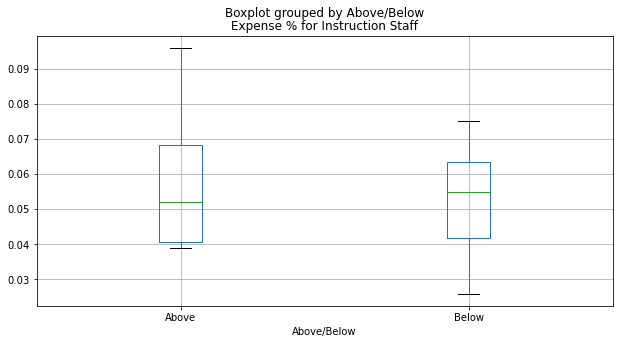

In [144]:
distict_exp.boxplot("Expense % for Instruction Staff", by="Above/Below", figsize=(10, 5))
plt.show()

In [145]:
# Extract individual groups
above = distict_exp[distict_exp["Above/Below"] == "Above"]["Expense % for Instruction Staff"]
below = distict_exp[distict_exp["Above/Below"] == "Below"]["Expense % for Instruction Staff"]

# Perform the ANOVA
sts.f_oneway(above, below)

F_onewayResult(statistic=0.3726758271725807, pvalue=0.5506875670744544)

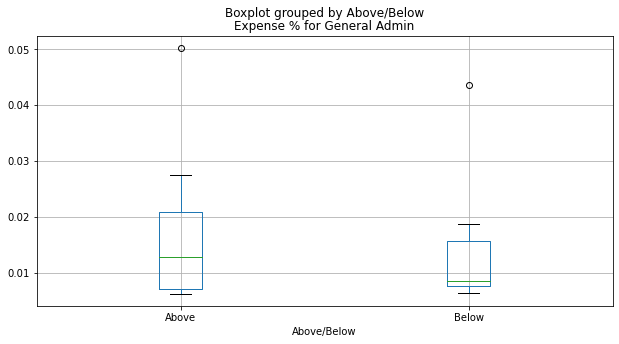

In [120]:
distict_exp.boxplot("Expense % for General Admin", by="Above/Below", figsize=(10, 5))
plt.show()

In [121]:
# Extract individual groups
above = distict_exp[distict_exp["Above/Below"] == "Above"]["Expense % for General Admin"]
below = distict_exp[distict_exp["Above/Below"] == "Below"]["Expense % for General Admin"]

# Perform the ANOVA
sts.f_oneway(above, below)

F_onewayResult(statistic=0.3919422909974175, pvalue=0.5406904370022991)

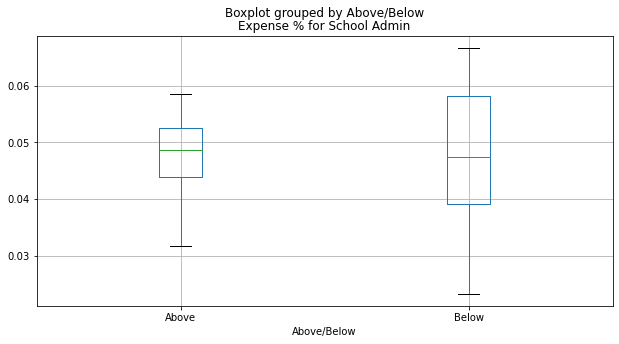

In [122]:
distict_exp.boxplot("Expense % for School Admin", by="Above/Below", figsize=(10, 5))
plt.show()

In [123]:
# Extract individual groups
above = distict_exp[distict_exp["Above/Below"] == "Above"]["Expense % for School Admin"]
below = distict_exp[distict_exp["Above/Below"] == "Below"]["Expense % for School Admin"]

# Perform the ANOVA
sts.f_oneway(above, below)

F_onewayResult(statistic=0.0014902616910983178, pvalue=0.9697152928824481)

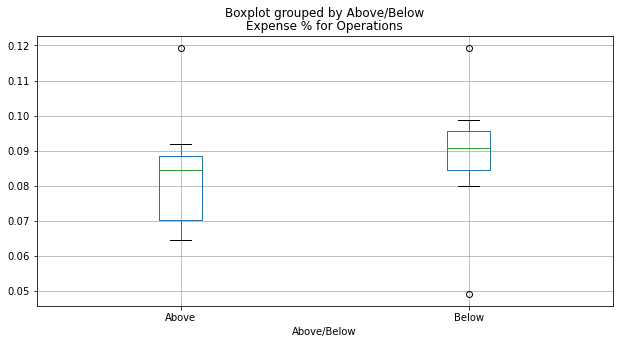

In [124]:
distict_exp.boxplot("Expense % for Operations", by="Above/Below", figsize=(10, 5))
plt.show()

In [125]:
# Extract individual groups
above = distict_exp[distict_exp["Above/Below"] == "Above"]["Expense % for Operations"]
below = distict_exp[distict_exp["Above/Below"] == "Below"]["Expense % for Operations"]

# Perform the ANOVA
sts.f_oneway(above, below)

F_onewayResult(statistic=0.36778592613126654, pvalue=0.5532819313879191)

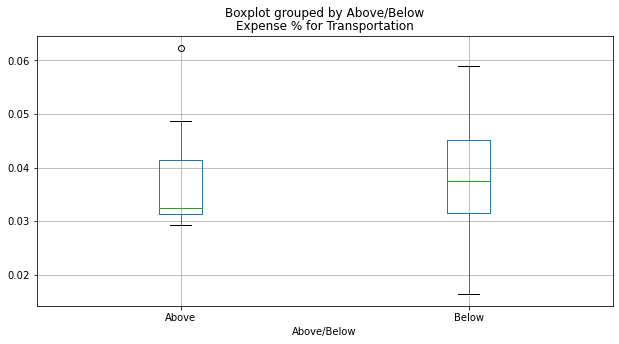

In [126]:
distict_exp.boxplot("Expense % for Transportation", by="Above/Below", figsize=(10, 5))
plt.show()

In [127]:
# Extract individual groups
above = distict_exp[distict_exp["Above/Below"] == "Above"]["Expense % for Transportation"]
below = distict_exp[distict_exp["Above/Below"] == "Below"]["Expense % for Transportation"]

# Perform the ANOVA
sts.f_oneway(above, below)

F_onewayResult(statistic=0.004685193882488211, pvalue=0.9463327480477524)

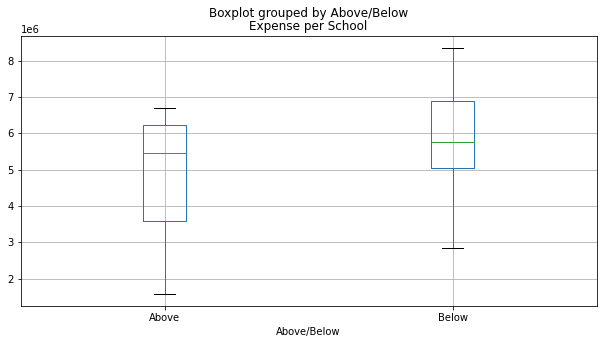

In [128]:
distict_exp.boxplot("Expense per School", by="Above/Below", figsize=(10, 5))
plt.show()

In [129]:
# Extract individual groups
above = distict_exp[distict_exp["Above/Below"] == "Above"]["Expense per School"]
below = distict_exp[distict_exp["Above/Below"] == "Below"]["Expense per School"]

# Perform the ANOVA
sts.f_oneway(above, below)

F_onewayResult(statistic=1.0913704954691024, pvalue=0.312712069885964)

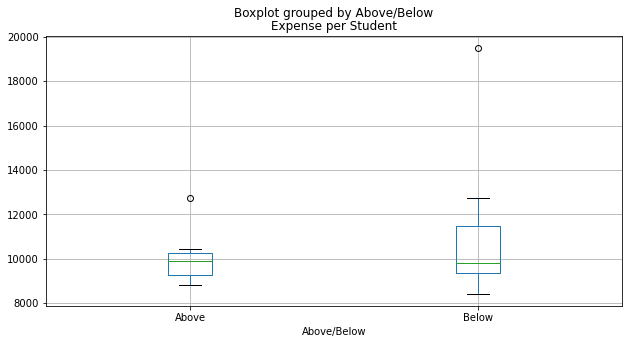

In [130]:
distict_exp.boxplot("Expense per Student", by="Above/Below", figsize=(10, 5))
plt.show()

In [131]:
# Extract individual groups
above = distict_exp[distict_exp["Above/Below"] == "Above"]["Expense per Student"]
below = distict_exp[distict_exp["Above/Below"] == "Below"]["Expense per Student"]

# Perform the ANOVA
sts.f_oneway(above, below)

F_onewayResult(statistic=0.5276251270441006, pvalue=0.47878951870686415)

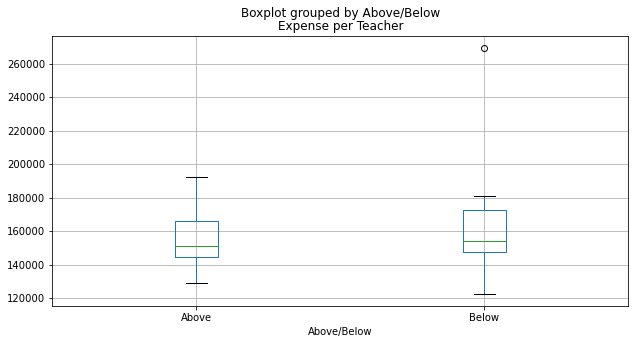

In [132]:
distict_exp.boxplot("Expense per Teacher", by="Above/Below", figsize=(10, 5))
plt.show()

In [133]:
# Extract individual groups
above = distict_exp[distict_exp["Above/Below"] == "Above"]["Expense per Teacher"]
below = distict_exp[distict_exp["Above/Below"] == "Below"]["Expense per Teacher"]

# Perform the ANOVA
sts.f_oneway(above, below)

F_onewayResult(statistic=0.28395120678309405, pvalue=0.6019289896645564)

In [139]:
# dist_above_exp = districts_above_financials[["District Name","Total Schools", "Total Students Enrolled", "Total FTE Teachers",
#                                              "Total Expense", "Total Expense for Instruction Staff", "Total Expense for General Admin", 
#                                              "Total Expense for School Admin", "Total Expense for Operations",
#                                              "Total Expense for Student Transportation"]]


# above_perc_instr = dist_above_exp["Total Expense for Instruction Staff"] / dist_above_exp["Total Expense"]
# above_perc_gen_admin = dist_above_exp["Total Expense for General Admin"]/dist_above_exp["Total Expense"]
# above_perc_sch_admin = dist_above_exp["Total Expense for School Admin"]/dist_above_exp["Total Expense"]
# above_perc_oper = dist_above_exp["Total Expense for Operations"]/dist_above_exp["Total Expense"]
# above_perc_trans = dist_above_exp["Total Expense for Student Transportation"]/dist_above_exp["Total Expense"]
# above_per_school = dist_above_exp["Total Expense"]/dist_above_exp["Total Schools"]
# above_per_student = dist_above_exp["Total Expense"]/dist_above_exp["Total Students Enrolled"]
# above_per_teacher = dist_above_exp["Total Expense"]/dist_above_exp["Total FTE Teachers"]


# dist_above_exp["Expense % for Instruction Staff"] = above_perc_instr
# dist_above_exp["Expense % for General Admin"] = above_perc_gen_admin
# dist_above_exp["Expense % for School Admin"] = above_perc_sch_admin
# dist_above_exp["Expense % for Operations"] = above_perc_oper
# dist_above_exp["Expense % for Transportation"] = above_perc_trans
# dist_above_exp["Expense per School"] = above_per_school
# dist_above_exp["Expense per Student"] = above_per_student
# dist_above_exp["Expense per Teacher"] = above_per_teacher


# # Format columns
# dist_above_exp = dist_above_exp.style.format({"Total Expense": "${:,.0f}" , "Total Expense for Instruction Staff":"${:,.0f}",
#                                                             "Total Expense for General Admin":"${:,.0f}", "Total Expense for School Admin":"${:,.0f}",
#                                                             "Total Expense for Operations":"${:,.0f}", "Total Expense for Student Transportation":"${:,.0f}",
#                                                             "Expense % for Instruction Staff":"{:.2%}", "Expense % for General Admin":"{:.2%}",
#                                                             "Expense % for School Admin":"{:.2%}", "Expense % for Operations":"{:.2%}",
#                                                             "Expense % for Transportation":"{:.2%}" ,"Expense per School":"${:,.0f}",
#                                                             "Expense per Student":"${:,.0f}", "Expense per Teacher":"${:,.0f}"})

# dist_above_exp

In [140]:
# dist_below_exp = districts_below_financials[["District Name","Total Schools", "Total Students Enrolled", "Total FTE Teachers", 
#                                              "Total Expense","Total Expense for Instruction Staff", "Total Expense for General Admin", 
#                                              "Total Expense for School Admin", "Total Expense for Operations",
#                                              "Total Expense for Student Transportation"]]


# below_perc_instr = dist_below_exp["Total Expense for Instruction Staff"] / dist_below_exp["Total Expense"]
# below_perc_gen_admin = dist_below_exp["Total Expense for General Admin"]/dist_below_exp["Total Expense"]
# below_perc_sch_admin = dist_below_exp["Total Expense for School Admin"]/dist_below_exp["Total Expense"]
# below_perc_oper = dist_below_exp["Total Expense for Operations"]/dist_below_exp["Total Expense"]
# below_perc_trans = dist_below_exp["Total Expense for Student Transportation"]/dist_below_exp["Total Expense"]
# below_per_school = dist_below_exp["Total Expense"]/dist_below_exp["Total Schools"]
# below_per_student = dist_below_exp["Total Expense"]/dist_below_exp["Total Students Enrolled"]
# below_per_teacher = dist_below_exp["Total Expense"]/dist_below_exp["Total FTE Teachers"]


# dist_below_exp["Expense % for Instruction Staff"] = below_perc_instr
# dist_below_exp["Expense % for General Admin"] = below_perc_gen_admin
# dist_below_exp["Expense % for School Admin"] = below_perc_sch_admin
# dist_below_exp["Expense % for Operations"] = below_perc_oper
# dist_below_exp["Expense % for Transportation"] = below_perc_trans
# dist_below_exp["Expense per School"] = below_per_school
# dist_below_exp["Expense per Student"] = below_per_student
# dist_below_exp["Expense per Teacher"] = below_per_teacher

# # Format columns
# dist_below_exp = dist_below_exp.style.format({"Total Expense": "${:,.0f}" , "Total Expense for Instruction Staff":"${:,.0f}",
#                                                             "Total Expense for General Admin":"${:,.0f}", "Total Expense for School Admin":"${:,.0f}",
#                                                             "Total Expense for Operations":"${:,.0f}", "Total Expense for Student Transportation":"${:,.0f}",
#                                                             "Expense % for Instruction Staff":"{:.2%}", "Expense % for General Admin":"{:.2%}",
#                                                             "Expense % for School Admin":"{:.2%}", "Expense % for Operations":"{:.2%}",
#                                                             "Expense % for Transportation":"{:.2%}" ,"Expense per School":"${:,.0f}",
#                                                             "Expense per Student":"${:,.0f}", "Expense per Teacher":"${:,.0f}"})

# dist_below_exp

In [ ]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
# quartiles = florida_dropout_rate["Total Dropout Rate"].quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq
# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)

# # Generate a box plot of the final tumor volume of each mouse across four regimens of interest with Matplotlib
# plt.boxplot(florida_dropout_rate["Total Dropout Rate"], patch_artist=False,
#                 medianprops=dict(color="g"),boxprops=dict(color="b"))
# plt.title("Boxplot grouped by Drug Regimen")
# plt.ylabel('Tumor Volume (mm3)')
# plt.xlabel('Drug Regimen')
# plt.show()